<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/5_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data¶
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and create a `DataFrame` called `gdp_pcv` that contains the data from Makridakis Chapter 5. 

In [75]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

gdp_pcv = pd.DataFrame(
    {
        'gdp': [7.90, 7.92, 7.91, 7.96, 7.98, 8.01, 8.05, 8.06, 8.06, 8.07, 8.09, 8.11, 8.14, 8.17, 8.19, 8.23, 8.27, 8.29, 8.30], 
        'pcv': [8.45, 8.52, 8.25, 8.58, 8.58, 8.63, 8.74, 8.70, 8.61, 8.59, 8.77, 8.80, 8.79, 8.83, 8.91, 8.97, 8.97, 9.04, 9.05]
    }
)

# Inspecting the data

We have two columns in our `DataFrame`, which we'd like to plot against one another in a scatter plot. To plot a scatter plot of two columns in a `DataFrame`, you can call the `.plot.scatter('x_column', 'y_column')`

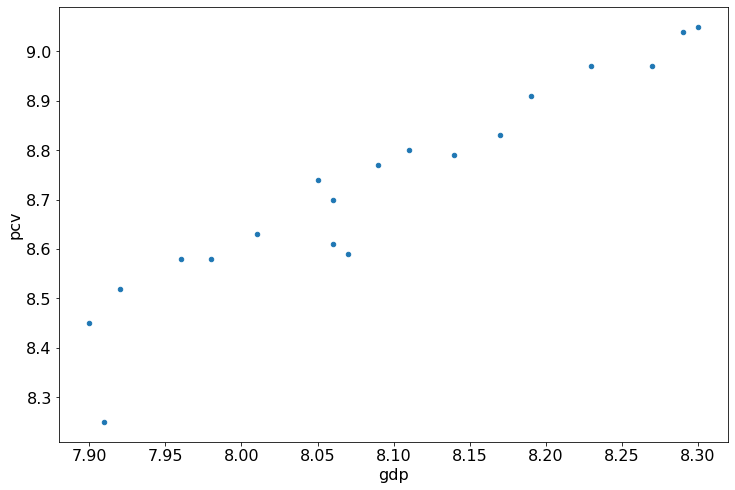

In [49]:
gdp_pcv.plot.scatter('gdp','pcv')

# Fitting an OLS model

To carry out ordinary least squares estimation on two variables, we'll use the `ols` model, which can be imported from `from statsmodels.formula.api` as follows:

```
from statsmodels.formula.api import ols
```

The ols package accepts the following arguments which are of interest to us:

* **`formula`**: The formula specifying the model
* **`data`**: The data to be fit for the model

In our case, we'd like to fit in the form `y ~ x + 1` (the `+ 1` here is to tell the model that we'd like to fit an intercept term as well), so our formula will be `formula='pvc ~ gdp + 1'`. Don't forget the single quotes `'` around the formula, as we're passing it in as a string!!

We also need to pass in our `DataFrame` that has the data, so we'll pass `data=gdp_pcv`.

We'll then call `model.fit()` to fit the model and create a `results` object. Our results object will have all of the data of interest for the fit, including results from sigificance tests. 

In [50]:
# Create an instance of the model
model = ols('pcv ~ gdp + 1', data=gdp_pcv)

# Fit the model
results = model.fit()

# Print out a summary for the fit results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pcv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.64e-10
Time:                        21:01:02   Log-Likelihood:                 25.519
No. Observations:                  19   AIC:                            -47.04
Df Residuals:                      17   BIC:                            -45.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0913      1.000     -4.092      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


# Plotting the Linear Model

We can access the linear estimate for the original data by calling `results.fittedvalues`

```
y_pred = results.fittedvalues
```

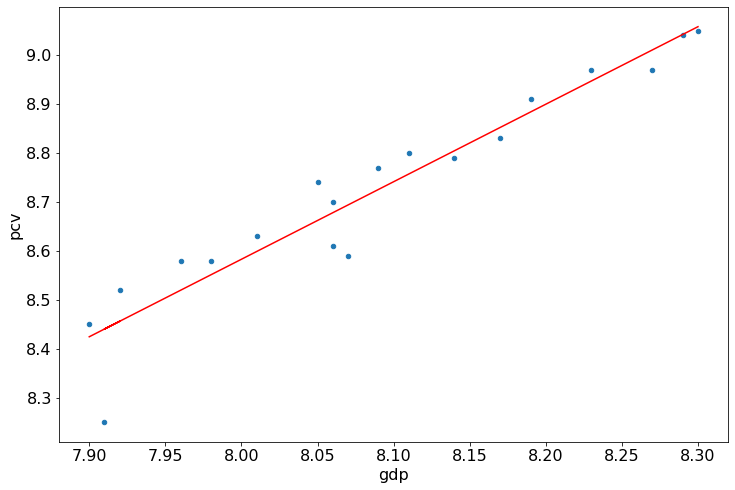

In [55]:
# Access the fitted values
y_pred = results.fittedvalues

# Plot the scatter plot of the data, 
# as well as the linear fit
gdp_pcv.plot.scatter('gdp','pcv')
plt.plot(gdp_pcv['gdp'], y_pred, color='red')

# Inspecting residuals

We can access the residuals of the fit by calling `results.resid`, just as we accessed the fitted values. It's useful to look at the points in the residuals relative to the observed standard deviation of the residuals, to help identify any outliers that are far away from the center

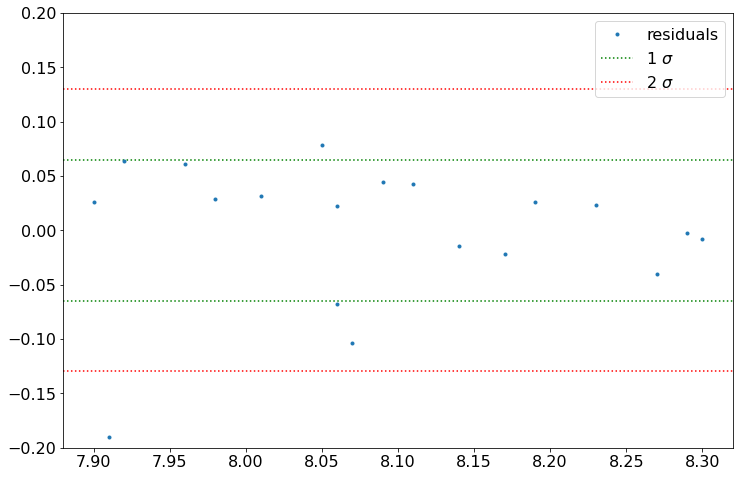

In [59]:
# Get the residual values
residual = results.resid

# Compute the STD of the residuals
residual_std =  residual.std()

# Plot the residuals
plt.plot(gdp_pcv['gdp'], residual, linestyle='', marker='.')

# Plot a horizontal line for 
# both one and two STD
plt.ylim(-0.2, 0.2)
x_min, x_max = plt.xlim()
plt.hlines([-1*residual_std, 1*residual_std], x_min, x_max, color='green', linestyle='dotted')
plt.hlines([-2*residual_std, 2*residual_std], x_min, x_max, color='red', linestyle='dotted')
plt.xlim(x_min, x_max)
my_figure = plt.legend(['residuals', '1 $\sigma$', '2 $\sigma$'])

# F-score

We can access the computed `F-statistic` directly via:

```
results.fvalue
```

Recall that the formula for the F-score is:

$$F = \frac{MSE}{MSR} = \frac{\frac{SSE}{m-1}}{\frac{SSR}{n-m}}$$

The explained mean squared error(MSE) can be accessed via `results.mse_model`, and the residual mean squared error (MSR) can be accessed via `results.mse_resid`

We can also access the explained sum of squares with `results.ess`, and the sum of squares of the residuals via `results.ssr`. Using these, along with the knowlede that our number of parameters `m` is 2 (fitting a slope and intercept), we can compute the F-statistic:

In [81]:
m = 2

n = gdp_pcv.shape[0]

explained_ss = results.ess

explained_df = m - 1

unexplained_ss = results.ssr

unexplained_df = n - m

F = (explained_ss/explained_df) / (unexplained_ss/unexplained_df)

print(f"F-statistic: {F}")

F-statistic: 164.36189511728057


We can also compute an ANOVA table for the F-score by passing our `results` object into `sm.stats.anova_lm()`. Note that this only prints results for any calculated slopes, as the F-test tests for a relationship between $Y$ and $X$

In [82]:
table = sm.stats.anova_lm(results)
print(table)

            df    sum_sq   mean_sq           F        PR(>F)
gdp        1.0  0.732872  0.732872  164.361895  3.635325e-10
Residual  17.0  0.075801  0.004459         NaN           NaN


# `t` statistic

As we can see from the results summary for the model, the t-value for both the slope and the intercept is significant (p < 0.05). We can plot the t-values for each of the parameters on top of the t-distribution for 2 degrees of freedom (two model parameters), and visualize how extreme these values are for this distribution. 

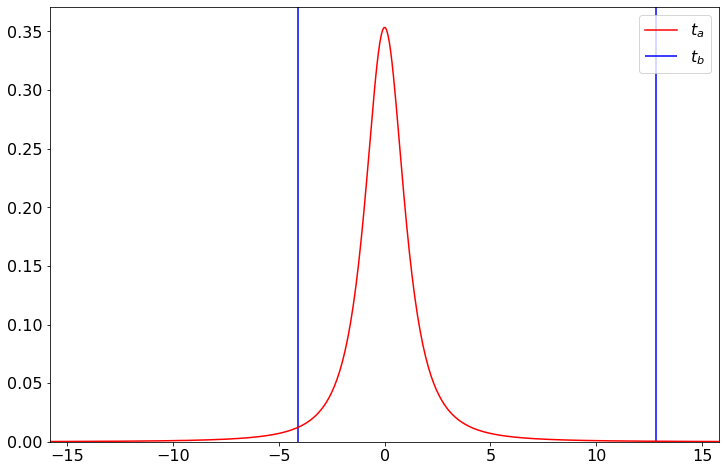

In [99]:
# We have two degrees of freedom for the t-distribution
df = 2

# Get the tvalues
tvalues = results.tvalues

# Get the range for our plot
# (want to make sure it includes both values)
r = abs(results.tvalues).max()

# Get the range we want to plot the distribution over
x = np.linspace(-r-3,
                r+3, 500)
plt.plot(x, t.pdf(x, df),
       'r-', label='t pdf')

y_min, y_max = plt.ylim()

plt.vlines(tvalues, 0, y_max, color='blue')

plt.ylim(0, y_max)

plt.xlim(-r-3, r+3)

plt.legend(['$t_{a}$', '$t_{b}$'])